In [1]:
import numpy as np
import scipy.special
import csv
import pandas as pd

In [2]:
from neuralNetwork import neuralNetwork


In [3]:
input_nodes = 5
hidden_nodes = 512
output_nodes = 5
learning_rate = 0.3

In [4]:
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [5]:
import makedata

In [6]:
Data = makedata.MakeData()

In [7]:
inputs = Data.input_learn
outputs = Data.output_learn
input_test = Data.input_test
output_test = Data.output_test
mses = []
num_list = []

In [8]:
import scipy
import scipy.special

In [17]:
mses = []
for i in range(len(inputs)):
    targets = np.zeros(output_nodes)
    targets[int(outputs[i][0])-1] = 0.99
    n.train(inputs[i], targets)
    num_list.append(i)
    mse = 0
    for k in range(len(input_test)):
        query = n.query(input_test[k])
        # print(query)
        test_targets = np.zeros(output_nodes)
        test_targets[int(output_test[k][0])-1] = 0.99
        for j in range(len(query)):
            mse += (query[j][0] - test_targets[j])**2
            # print(mse)

    mse = mse/5/len(input_test)

    mses.append(mse)

correct = 0
near = 0
for i in range(len(input_test)):
    q = n.query(input_test[i])
    if q.argmax(axis=0)[0]+1 == output_test[i][0]:
        correct +=1
        near +=1
    elif q.argmax(axis=0)[0]+2 == output_test[i][0] or q.argmax(axis=0)[0] == output_test[i][0]:
        near +=1

print(f"正解　{correct/len(output_test)}")
print(f"惜しい{near/len(output_test)}")


正解　0.3333333333333333
惜しい0.6190476190476191


In [28]:
q = n.query(input_test[1])
q.reshape(1,5)
label = ["男性の平均寿命", "女性の平均寿命", "幸福度", "出生率", "1人当たりのGDP", "自殺率が1っぽさ", "自殺率が2っぽさ", "自殺率が3っぽさ", "自殺率が4っぽさ", "自殺率が5っぽさ"]
x = np.append(input_test[0], q.reshape(1,5))
x

array([-1.66872549, -1.61293555, -1.49298941,  0.440686  , -0.62428609,
        0.46477184,  0.38959942,  0.22415953,  0.05338928, -0.        ])

In [10]:
import matplotlib.pyplot as plt

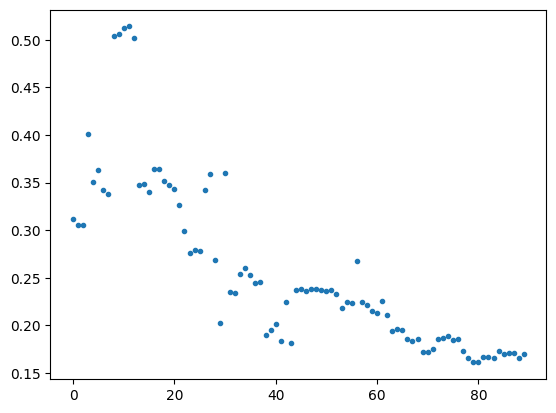

In [11]:
plt.plot(mses, ".")

In [12]:
correct = 0
for i in range(len(input_test)):
    q = n.query(input_test[i])
    if q.argmax(axis=0)[0]+1 == output_test[i][0]:
        correct +=1

correct/len(output_test)

0.30952380952380953

In [13]:
q.argmax(axis=0)[0]+1

1

In [14]:
x = np.arange(-4,4,0.025)
y = np.array([ i*(i>0.0) for i in x])

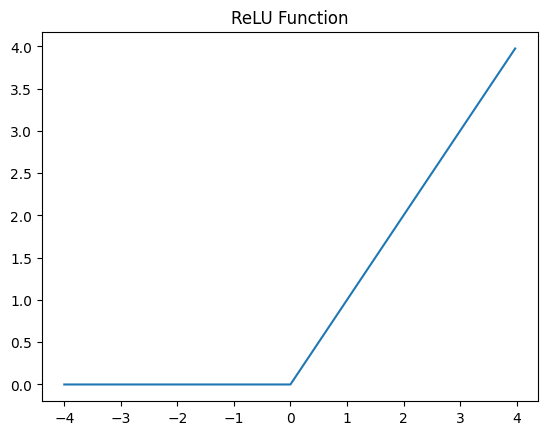

In [15]:
plt.plot(x,y)
plt.title("ReLU Function")
plt.show()